In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
plt.rcParams['font.family'] = 'Meiryo' 

# Excelファイルを読み込む
file_path = '重症割合と件数2.xlsx'
# シート名を確認
xl = pd.ExcelFile(file_path)
print("シート名:", xl.sheet_names)

# 最初のシートを読み込んで確認
df = pd.read_excel(file_path, sheet_name=0)
print("\nデータの形状:", df.shape)
print("\nカラム名:", df.columns.tolist())
print("\n最初の数行:")
df.head(10)


シート名: ['2023 ', '2024']

データの形状: (52, 14)

カラム名: ['順位', '週の始まり', '週の終わり', '重症割合', '総件数', '日平均', '重症系', '軽症系', '搬送数ランク', '平均RT', '重症RT', '6分達成', '13分達成', '重症6分']

最初の数行:


,順位,週の始まり,週の終わり,重症割合,総件数,日平均,重症系,軽症系,搬送数ランク,平均RT,重症RT,6分達成,13分達成,重症6分
0,1位,2023-01-22,2023-01-28,0.0927,9467,1352.4,878,8589,48,9.91,9.73,0.2968,0.7916,0.3337
1,2位,2023-01-29,2023-02-04,0.0878,9641,1377.3,846,8795,44,9.59,9.43,0.3003,0.8098,0.3050
2,3位,2023-01-08,2023-01-14,0.0871,9957,1422.4,867,9090,37,11.88,11.54,0.2046,0.6675,0.2330
3,4位,2023-01-15,2023-01-21,0.0849,9467,1352.4,804,8663,48,9.46,9.54,0.3209,0.8169,0.2973
4,5位,2023-01-01,2023-01-07,0.0843,10512,1501.7,886,9626,27,11.81,11.59,0.1972,0.6758,0.2043
5,6位,2023-02-05,2023-02-11,0.0788,9467,1352.4,746,8721,48,9.00,8.65,0.3409,0.8444,0.3525
6,7位,2023-02-19,2023-02-25,0.0788,9424,1346.3,743,8681,51,8.53,8.23,0.3827,0.8723,0.4240
7,8位,2023-02-26,2023-03-04,0.0786,9687,1383.9,761,8926,42,8.33,8.14,0.3950,0.8818,0.4205
8,9位,2023-02-12,2023-02-18,0.0772,9763,1394.7,754,9009,40,9.40,9.08,0.3273,0.8168,0.3541
9,10位,2023-03-05,2023-03-11,0.0768,9540,1362.9,733,8807,47,8.21,8.14,0.3983,0.8890,0.4229


In [4]:
# 2番目のシートも確認
df2 = pd.read_excel(file_path, sheet_name=1)
print("2番目のシートのデータの形状:", df2.shape)
print("\nカラム名:", df2.columns.tolist())
print("\n最初の数行:")
df2.head(10)


2番目のシートのデータの形状: (51, 23)

カラム名: ['順位', '週のはじまり', '週の終わり', '重症割合', '総件数(件)', '日平均(件/日)', '重症系(件)', '軽症系(件)', '搬送数ランク(位)', '平均RT(分)', '重症RT(分)', '6分達成', '13分達成', '重症6分', '備考', '直近隊-時間', '直近隊-距離', '傷病度考慮', 'PPO-重症率特化', 'MEXCLP', 'PPO-次元削減114014', 'PPO-次元削減212455', '2番目選択']

最初の数行:


,順位,週のはじまり,週の終わり,重症割合,総件数(件),日平均(件/日),重症系(件),軽症系(件),搬送数ランク(位),平均RT(分),...,重症6分,備考,直近隊-時間,直近隊-距離,傷病度考慮,PPO-重症率特化,MEXCLP,PPO-次元削減114014,PPO-次元削減212455,2番目選択
0,1位,2024-02-04,2024-02-10,0.0824,10739,1534.1,885,9854,24,9.84,...,0.3559,NaN,7.82,7.93,7.47,8.03,NaN,7.92,7.85,NaN
1,2位,2024-01-28,2024-02-03,0.0794,10620,1517.1,843,9777,27,8.74,...,0.4128,冬季閑散期,7.92,8.30,7.80,8.16,NaN,NaN,7.83,NaN
2,3位,2024-11-17,2024-11-23,0.0792,10659,1522.7,844,9815,25,7.98,...,0.4526,NaN,7.34,7.66,7.07,NaN,NaN,NaN,7.35,NaN
3,4位,2024-01-14,2024-01-20,0.0787,11473,1639.0,903,10570,11,10.11,...,0.3189,NaN,9.31,9.51,9.63,NaN,NaN,NaN,9.34,9.67
4,5位,2024-11-24,2024-11-30,0.0777,10623,1517.6,825,9798,26,8.04,...,0.4485,NaN,7.35,7.63,7.09,NaN,NaN,NaN,7.41,7.28
5,6位,2024-01-21,2024-01-27,0.0776,11231,1604.4,871,10360,15,9.65,...,0.3295,NaN,9.47,9.62,9.26,NaN,NaN,NaN,9.47,9.68
6,7位,2024-12-01,2024-12-07,0.0772,10879,1554.1,840,10039,19,7.67,...,0.4762,NaN,7.83,7.93,7.69,NaN,NaN,NaN,7.83,7.59
7,8位,2024-12-22,2024-12-28,0.0738,13565,1937.9,1001,12564,1,10.06,...,0.3157,NaN,11.04,11.18,10.81,11.13,NaN,NaN,10.89,NaN
8,9位,2024-03-31,2024-04-06,0.0738,10232,1461.7,755,9477,47,7.94,...,0.4570,NaN,7.08,7.26,6.81,NaN,NaN,NaN,7.11,7.27
9,10位,2024-02-18,2024-02-24,0.0732,10577,1511.0,774,9803,32,8.53,...,0.4212,NaN,7.42,7.63,7.34,NaN,NaN,NaN,7.42,7.20


In [6]:
# 散布図の作成
# 2024年のデータを読み込み（2番目のシート）
df = pd.read_excel(file_path, sheet_name=1)

# カラム名を設定
date_col = '週のはじまり'  # 日付列
cases_col = '総件数(件)'   # 搬送件数列
severe_rate_col = '重症割合'  # 重症割合列

print(f"日付列: {date_col}")
print(f"搬送件数列: {cases_col}")
print(f"重症割合列: {severe_rate_col}")

# 日付をdatetime型に変換
df[date_col] = pd.to_datetime(df[date_col])

# 月を抽出
df['月'] = df[date_col].dt.month

# 季節を判定する関数
def get_season(month):
    if month in [3, 4, 5]:
        return '春（3-5月）'
    elif month in [6, 7, 8]:
        return '夏（6-8月）'
    elif month in [9, 10, 11]:
        return '秋（9-11月）'
    else:  # 12, 1, 2
        return '冬（12-2月）'

df['季節'] = df['月'].apply(get_season)
print("\n季節別のデータ数:")
print(df['季節'].value_counts())

# 重症割合の値を確認
print(f"\n重症割合の範囲: {df[severe_rate_col].min():.4f} ~ {df[severe_rate_col].max():.4f}")
print(f"搬送件数の範囲: {df[cases_col].min()} ~ {df[cases_col].max()}")
df.head()


日付列: 週のはじまり
搬送件数列: 総件数(件)
重症割合列: 重症割合

季節別のデータ数:
季節
秋（9-11月）    13
春（3-5月）     13
夏（6-8月）     13
冬（12-2月）    12
Name: count, dtype: int64

重症割合の範囲: 0.0535 ~ 0.0824
搬送件数の範囲: 10145 ~ 13565


,順位,週のはじまり,週の終わり,重症割合,総件数(件),日平均(件/日),重症系(件),軽症系(件),搬送数ランク(位),平均RT(分),...,直近隊-時間,直近隊-距離,傷病度考慮,PPO-重症率特化,MEXCLP,PPO-次元削減114014,PPO-次元削減212455,2番目選択,月,季節
0,1位,2024-02-04,2024-02-10,0.0824,10739,1534.1,885,9854,24,9.84,...,7.82,7.93,7.47,8.03,NaN,7.92,7.85,NaN,2,冬（12-2月）
1,2位,2024-01-28,2024-02-03,0.0794,10620,1517.1,843,9777,27,8.74,...,7.92,8.30,7.80,8.16,NaN,NaN,7.83,NaN,1,冬（12-2月）
2,3位,2024-11-17,2024-11-23,0.0792,10659,1522.7,844,9815,25,7.98,...,7.34,7.66,7.07,NaN,NaN,NaN,7.35,NaN,11,秋（9-11月）
3,4位,2024-01-14,2024-01-20,0.0787,11473,1639.0,903,10570,11,10.11,...,9.31,9.51,9.63,NaN,NaN,NaN,9.34,9.67,1,冬（12-2月）
4,5位,2024-11-24,2024-11-30,0.0777,10623,1517.6,825,9798,26,8.04,...,7.35,7.63,7.09,NaN,NaN,NaN,7.41,7.28,11,秋（9-11月）


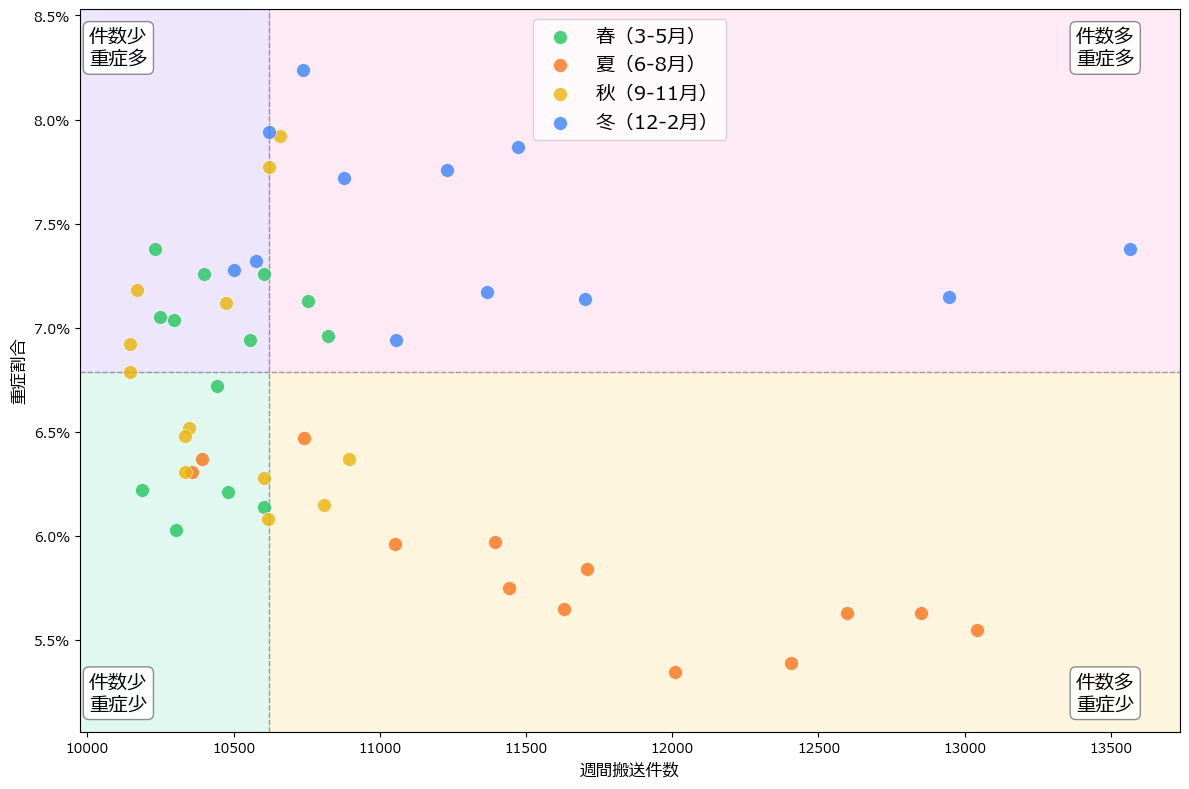

図を保存しました: 搬送件数と重症割合の散布図.png


In [8]:
# 散布図の作成（2Dマッピング：週間搬送件数 vs 重症割合）
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(12, 8))

# 重症割合をパーセンテージに変換（元データが小数の場合は*100）
# データの最大値が1以下なら小数形式、それ以上ならパーセント形式と判断
if df[severe_rate_col].max() <= 1:
    y_data = df[severe_rate_col] * 100
else:
    y_data = df[severe_rate_col]

df['重症割合_pct'] = y_data

# データの統計を計算して象限の区切り線を決定
x_median = df[cases_col].median()
y_median = df['重症割合_pct'].median()

# 軸の範囲を取得
x_min, x_max = df[cases_col].min(), df[cases_col].max()
y_min, y_max = df['重症割合_pct'].min(), df['重症割合_pct'].max()

# 余白を追加
x_margin = (x_max - x_min) * 0.05
y_margin = (y_max - y_min) * 0.1

# 軸の表示範囲
x_plot_min = x_min - x_margin
x_plot_max = x_max + x_margin
y_plot_min = y_min - y_margin
y_plot_max = y_max + y_margin

# 4象限の背景色を追加（fill_between使用）
# 左上（件数少・重症多）- 紫系
ax.fill_between([x_plot_min, x_median], y_median, y_plot_max, alpha=0.15, color='#8B5CF6', zorder=0)
# 右上（件数多・重症多）- ピンク系
ax.fill_between([x_median, x_plot_max], y_median, y_plot_max, alpha=0.15, color='#F472B6', zorder=0)
# 左下（件数少・重症少）- 緑系
ax.fill_between([x_plot_min, x_median], y_plot_min, y_median, alpha=0.15, color='#34D399', zorder=0)
# 右下（件数多・重症少）- 黄系
ax.fill_between([x_median, x_plot_max], y_plot_min, y_median, alpha=0.15, color='#FBBF24', zorder=0)

# 区切り線（点線）
ax.axhline(y=y_median, color='gray', linestyle='--', linewidth=1, alpha=0.7, zorder=1)
ax.axvline(x=x_median, color='gray', linestyle='--', linewidth=1, alpha=0.7, zorder=1)

# 季節ごとの色とマーカーを設定
season_colors = {
    '春（3-5月）': '#22C55E',   # 緑
    '夏（6-8月）': '#F97316',   # オレンジ
    '秋（9-11月）': '#EAB308',  # 黄色
    '冬（12-2月）': '#3B82F6'   # 青
}

# 季節の順序を定義
season_order = ['春（3-5月）', '夏（6-8月）', '秋（9-11月）', '冬（12-2月）']

# 季節ごとにプロット
for season in season_order:
    season_data = df[df['季節'] == season]
    ax.scatter(season_data[cases_col], season_data['重症割合_pct'],
               c=season_colors[season], label=season, s=100, alpha=0.8, 
               edgecolors='white', linewidths=0.5, zorder=2)

# 象限ラベルを追加
label_fontsize = 14
bbox_props = dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.9)

# 左上
ax.text(x_plot_min + (x_median - x_plot_min) * 0.05, y_plot_max - (y_plot_max - y_median) * 0.05,
        '件数少\n重症多', fontsize=label_fontsize, ha='left', va='top', bbox=bbox_props)
# 右上
ax.text(x_plot_max - (x_plot_max - x_median) * 0.05, y_plot_max - (y_plot_max - y_median) * 0.05,
        '件数多\n重症多', fontsize=label_fontsize, ha='right', va='top', bbox=bbox_props)
# 左下
ax.text(x_plot_min + (x_median - x_plot_min) * 0.05, y_plot_min + (y_median - y_plot_min) * 0.05,
        '件数少\n重症少', fontsize=label_fontsize, ha='left', va='bottom', bbox=bbox_props)
# 右下
ax.text(x_plot_max - (x_plot_max - x_median) * 0.05, y_plot_min + (y_median - y_plot_min) * 0.05,
        '件数多\n重症少', fontsize=label_fontsize, ha='right', va='bottom', bbox=bbox_props)

# 軸ラベル
ax.set_xlabel('週間搬送件数', fontsize=12)
ax.set_ylabel('重症割合', fontsize=12)

# Y軸をパーセンテージ表示
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# 凡例
ax.legend(loc='upper center', fontsize=14)

# グリッドを非表示
ax.grid(False)

# 軸の範囲を設定
ax.set_xlim(x_plot_min, x_plot_max)
ax.set_ylim(y_plot_min, y_plot_max)

plt.tight_layout()
plt.savefig('搬送件数と重症割合の散布図.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("図を保存しました: 搬送件数と重症割合の散布図.png")
